In [2]:
import bgflow
import bgmol
import numpy
import torch
import matplotlib.pyplot as plt

In [3]:
ala2 = bgmol.datasets.Ala2TSF300(root="../data", download=False, read=True)
zfactory = bgmol.zmatrix.ZMatrixFactory(ala2.system.mdtraj_topology)
zmatrix, fixed_atoms = zfactory.build_naive()
ictrafo = bgflow.GlobalInternalCoordinateTransformation(zmatrix, normalize_angles=True)

2048it [00:00, 17459216.65it/s]         


In [11]:
n_points = 100_000
data = torch.Tensor(ala2.xyz[200_000:200_000+n_points]).reshape(n_points, -1)
bonds, angles, torsions, x0, R, log_det_j = ictrafo(data)

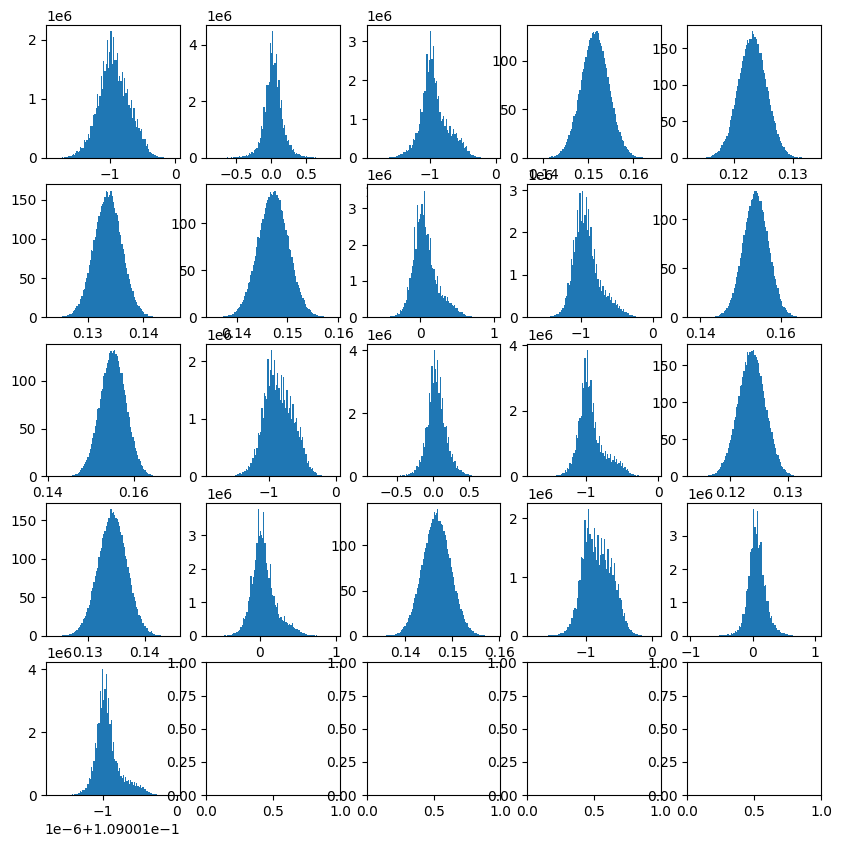

In [12]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        k = i * 5 + j
        if k < bonds.shape[1]:
            ax[i, j].hist(bonds[:, k].detach().numpy(), bins=100, density=True)

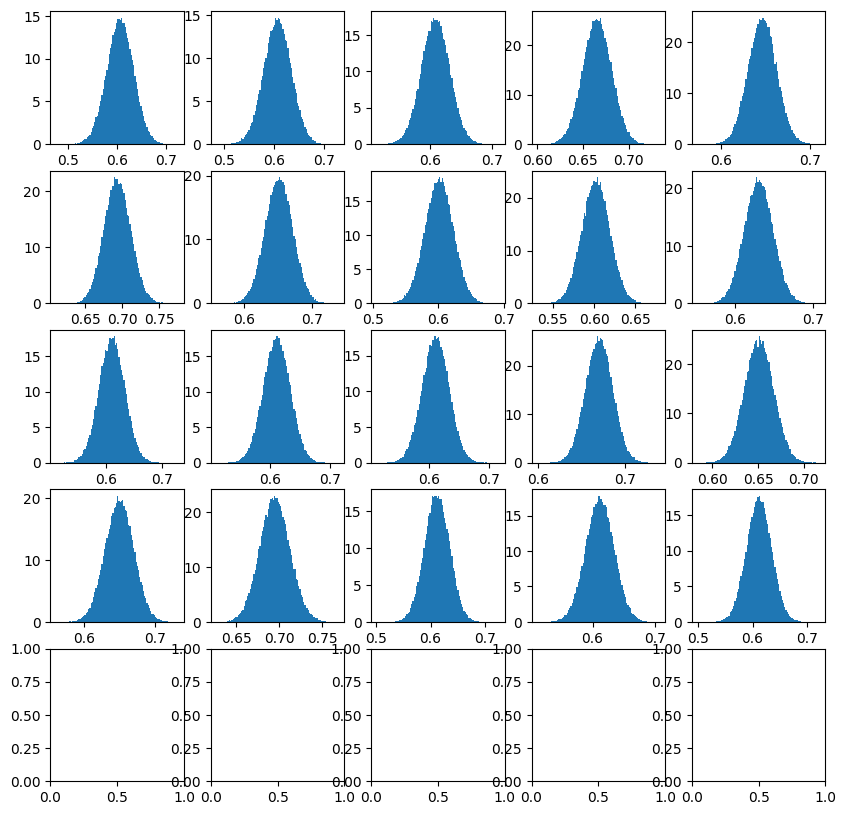

In [13]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        k = i * 5 + j
        if k < angles.shape[1]:
            ax[i, j].hist(angles[:, k].detach().numpy(), bins=100, density=True)

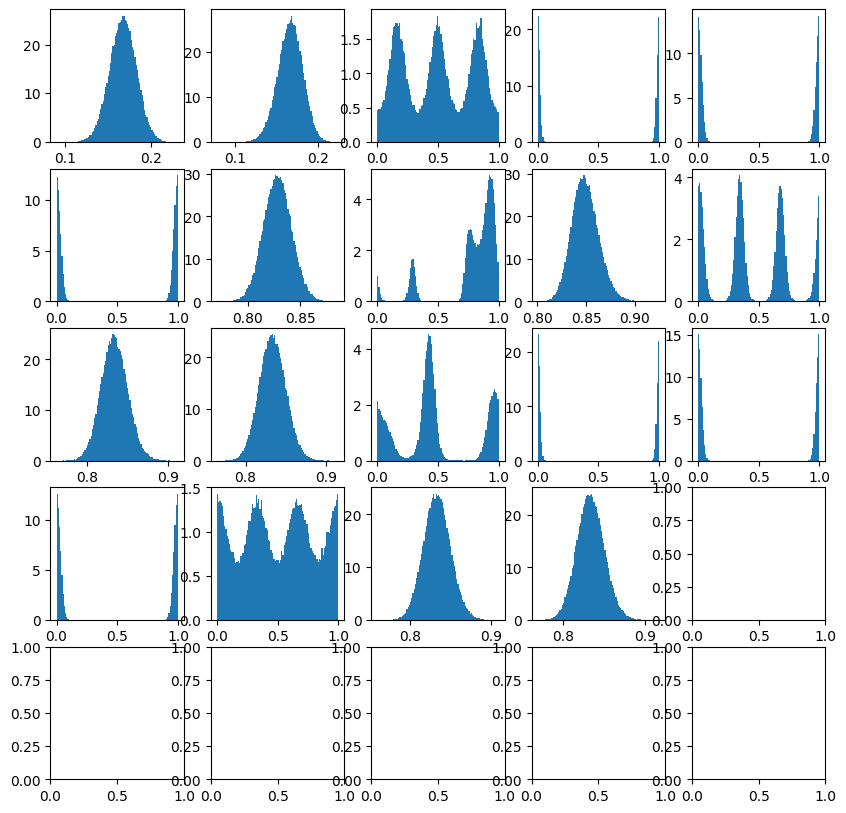

In [14]:
fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        k = i * 5 + j
        if k < torsions.shape[1]:
            ax[i, j].hist(torsions[:, k].detach().numpy(), bins=100, density=True)

(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 1.41019374e-03, 2.82038749e-03,
         9.87135621e-03, 1.41019374e-02, 4.51263895e-02, 6.76892997e-02,
         1.19866468e-01, 1.76274218e-01, 2.42553324e-01, 3.72291149e-01,
         3.99086507e-01, 4.90747423e-01, 5.06259554e-01, 4.71004711e-01,
         4.79465873e-01, 4.04725605e-01, 4.62545492e-01, 4.68184323e-01,
         4.87927036e-01, 5.41514398e-01, 5.90871179e-01, 7.09327454e-01,
         9.03934190e-01, 1.10841694e+00, 1.39468161

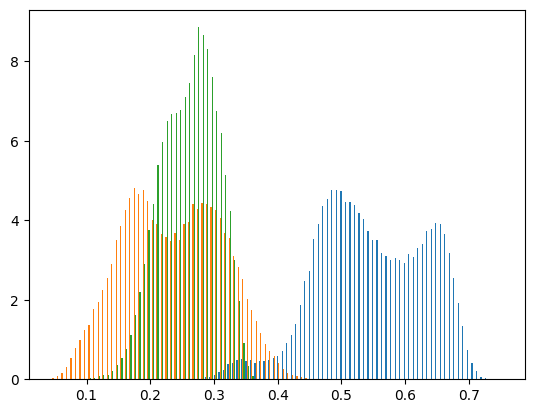

In [15]:
plt.hist(x0[:,0].detach().numpy(), bins=100, density=True)

(array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.49378966e-01, 1.15091982e+00, 1.07021508e+00,
         1.03763242e+00, 9.98031952e-01, 1.03312116

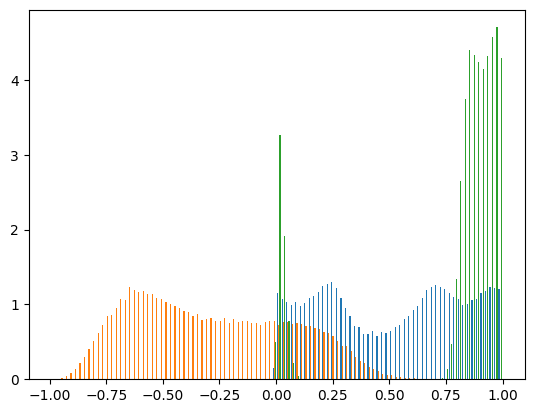

In [16]:
plt.hist(R.detach().numpy(), bins=100, density=True)